In [24]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import os
# import cv2
import IPython.display as ipd
import speech_recognition as spr
from sklearn.model_selection import train_test_split
import audioread
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
EPS = 1e-8
SR = 16000

Using TensorFlow backend.


In [3]:
def get_spectrogram(wav):
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    return spect
def load_wav_file(file_path, plot=True):
    wav, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(wav, sr = SR, n_mfcc=10)
    log_spect = np.log(get_spectrogram(wav))
    if plot:
        plt.imshow(mfcc,cmap='hot', interpolation='nearest')
        plt.show()
    return wav,sr, log_spect, mfcc

In [94]:
def plot_waves(category="Jack", mf=False):
    num_files = len(os.listdir("./audio/{0}/".format(category)))
    cols = 6
    rows = num_files // cols
    f, axarr = plt.subplots(rows, cols, figsize=(20,20))
    i = 0
    for file in os.listdir("./audio/{0}/".format(category)):
        if "csv" in file:
            continue
        row = i // cols
        col = i % cols
        color = "ocean"
        wav, sr,log_spect, mfcc = load_wav_file("./audio/{0}/".format(category) + file, plot=False)
        if mf:
            axarr[row,col].imshow(mfcc,cmap=color, interpolation='nearest')
        else:
            axarr[row,col].plot(wav)
        i+= 1
    plt.show()    

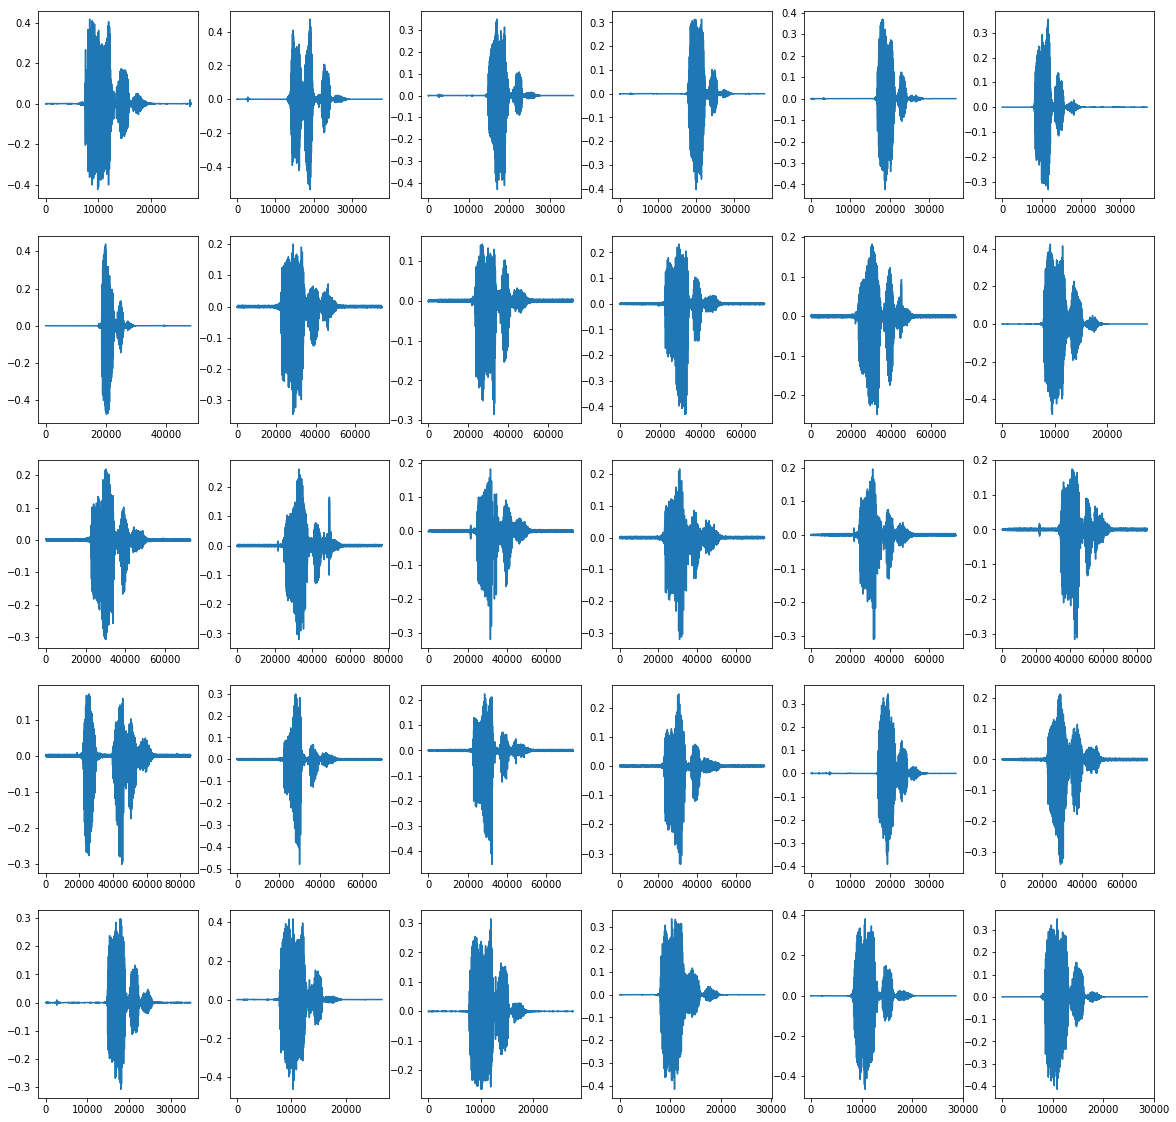

In [95]:
plot_waves()

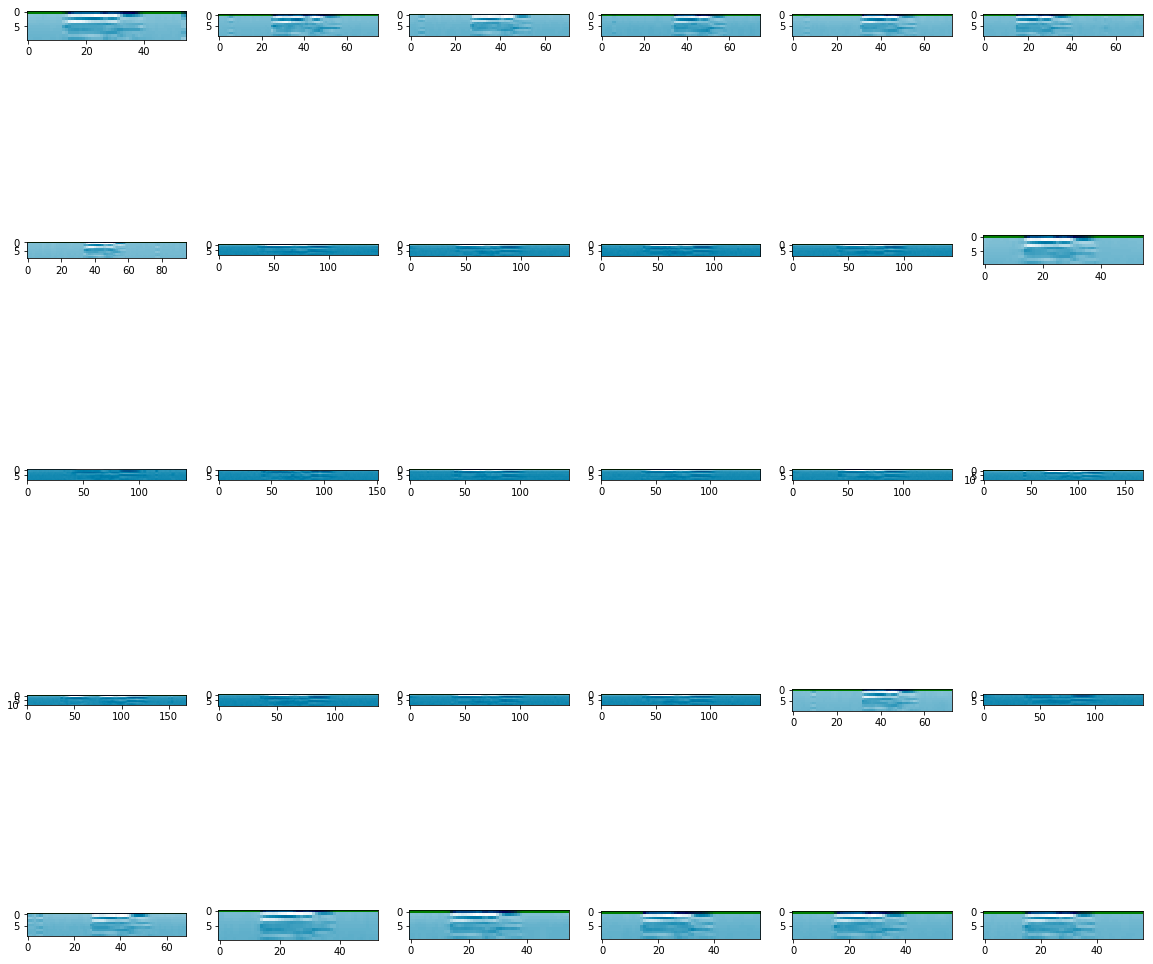

In [96]:
plot_waves(mf=True)